https://www.kaggle.com/imdevskp/corona-virus-report

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [98]:
data = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
data.index = data['Date']
data.columns = ['Province','Country','Lat','Long','Date','Confirmed','Deaths','Recovered']

In [158]:
data_indo = data[data['Country'] == 'Indonesia']
last = pd.to_datetime(str(data_indo['Date'].iloc[-1])).strftime('%Y-%m-%d')
# last = last_date.strftime('%Y-%m-%d')

In [159]:
data_indo['confirm_cumulative'] = data_indo['Confirmed'].diff()
data_indo['death_cumulative'] = data_indo['Deaths'].diff()
data_indo['recover_cumulative'] = data_indo['Recovered'].diff()

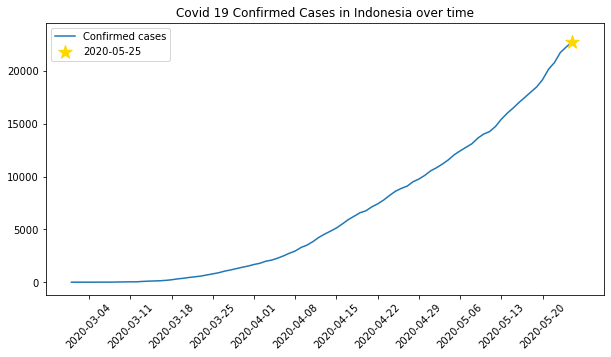

In [160]:
date_1 = pd.date_range(start='2020-03-01',end=last,freq='W-wed')

plt.figure(figsize=(10,5))
plt.title('Covid 19 Confirmed Cases in Indonesia over time')
plt.plot(data_indo['2020-03':].index,data_indo['2020-03':]['Confirmed'],label='Confirmed cases')
plt.scatter(data_indo[data_indo['Date']==last].index,data_indo[data_indo['Date']==last]['Confirmed'],marker='*',c='gold',zorder=3,s=200, label=f'{last}')
plt.xticks(date_1,rotation=45)
plt.legend()
plt.show()

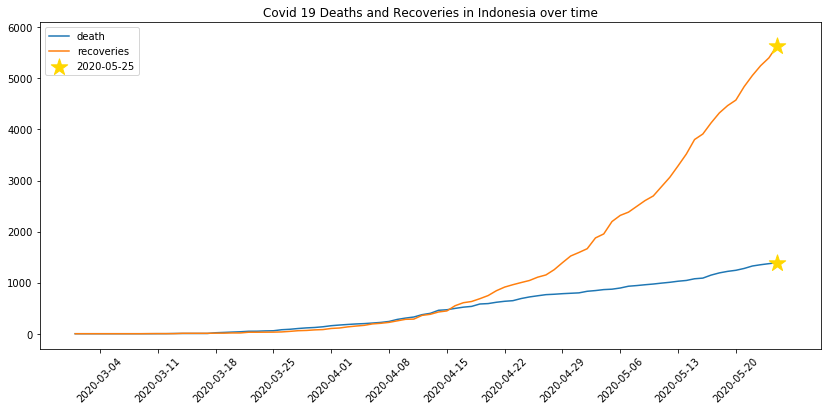

In [134]:
plt.figure(figsize=(14,6))
plt.title('Covid 19 Deaths and Recoveries in Indonesia over time')
plt.plot(data_indo['2020-03':].index,data_indo['2020-03':]['Deaths'],label='death')
plt.plot(data_indo['2020-03':].index,data_indo['2020-03':]['Recovered'],label='recoveries')
plt.scatter(data_indo[data_indo['Date']==last].index,data_indo[data_indo['Date']==last]['Deaths'],zorder=3,marker='*',c='gold',s=300,label=f'{last}')
plt.scatter(data_indo[data_indo['Date']==last].index,data_indo[data_indo['Date']==last]['Recovered'],zorder=3,marker='*',c='gold',s=300)
plt.xticks(date_1,rotation=45)
plt.legend()
plt.show()

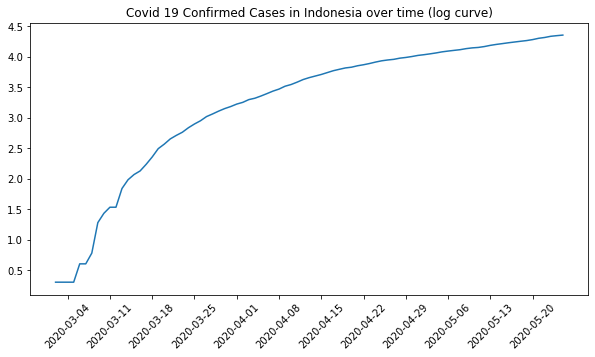

In [135]:
plt.figure(figsize=(10,5))
plt.title('Covid 19 Confirmed Cases in Indonesia over time (log curve)')
plt.plot(data_indo['2020-03':].index,np.log10(data_indo['2020-03':]['Confirmed']))
plt.xticks(date_1,rotation=45)
plt.show()

In [136]:
confirm_max = data_indo[data_indo['confirm_cumulative'] == data_indo['confirm_cumulative'].max()]
confirm_max

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,confirm_cumulative,death_cumulative,recover_cumulative
Date,,,,,,,,,,,
2020-05-21,NaN,Indonesia,-0.7893,113.9213,2020-05-21,20162,1278,4838,973.0,36.0,263.0


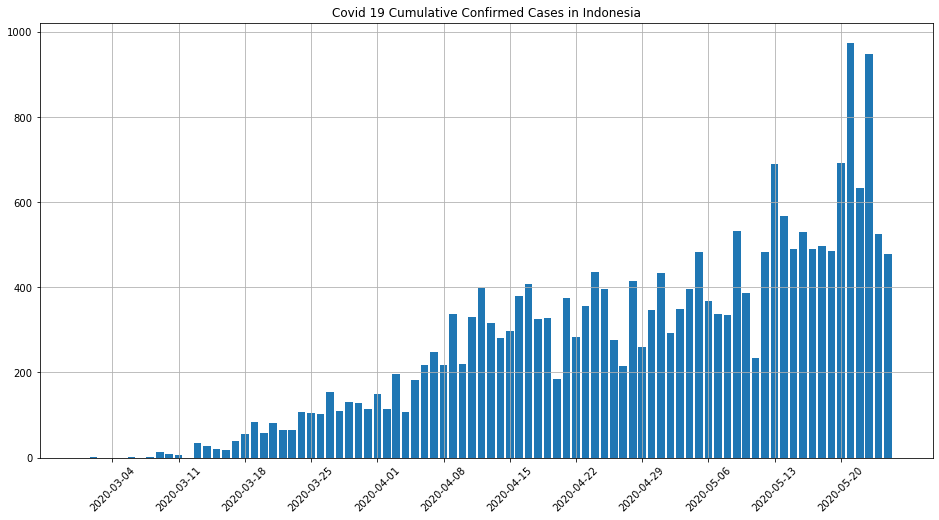

In [142]:
plt.figure(figsize=(16,8))
plt.title('Covid 19 Cumulative Confirmed Cases in Indonesia')
plt.bar(data_indo['2020-03':].index,data_indo['2020-03':]['confirm_cumulative'],zorder=1)
# plt.plot(data_indo['2020-03':].index,data_indo['2020-03':]['confirm_cumulative'],zorder=2, color='green')
plt.grid()
plt.xticks(date_1,rotation=45)
plt.show()

In [143]:
death_max = data_indo[data_indo['death_cumulative'] == data_indo['death_cumulative'].max()]
death_max

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,confirm_cumulative,death_cumulative,recover_cumulative
Date,,,,,,,,,,,
2020-04-14,NaN,Indonesia,-0.7893,113.9213,2020-04-14,4839,459,426,282.0,60.0,46.0


In [144]:
rec_max = data_indo[data_indo['recover_cumulative'] == data_indo['recover_cumulative'].max()]
rec_max

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,confirm_cumulative,death_cumulative,recover_cumulative
Date,,,,,,,,,,,
2020-05-15,NaN,Indonesia,-0.7893,113.9213,2020-05-15,16496,1076,3803,490.0,33.0,285.0


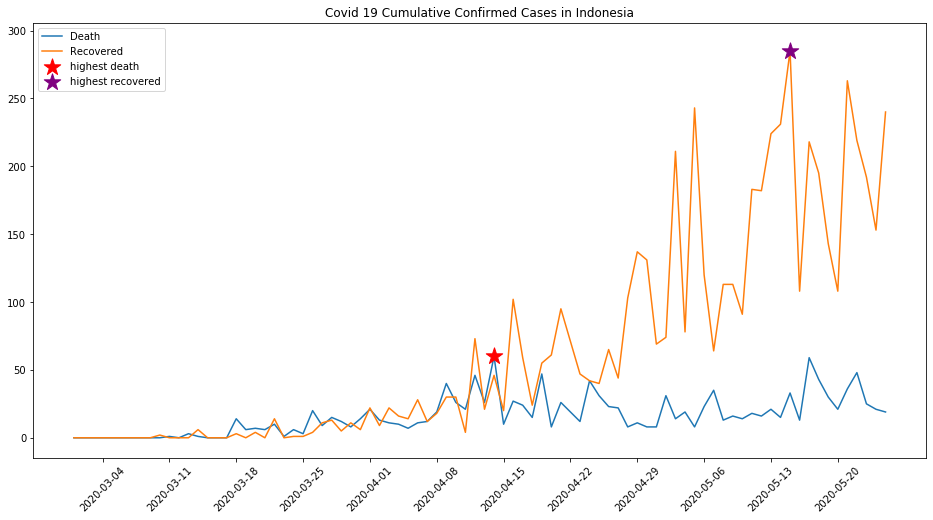

In [145]:
plt.figure(figsize=(16,8))
plt.title('Covid 19 Cumulative Confirmed Cases in Indonesia')
plt.plot(data_indo['2020-03':].index,data_indo['2020-03':]['death_cumulative'],label='Death',zorder=1)
plt.plot(data_indo['2020-03':].index, data_indo['2020-03':]['recover_cumulative'],label='Recovered',zorder=1)
plt.scatter(death_max.index, death_max['death_cumulative'],marker='*',color='red',s=300,zorder=2,label='highest death')
plt.scatter(rec_max.index,rec_max['recover_cumulative'],marker='*',color='purple',s=300,zorder=2,label='highest recovered')
plt.legend()
plt.xticks(date_1,rotation=45)
plt.show()

### Visualization for ASEAN countries

In [147]:
asean = ['Indonesia','Singapore','Thailand','Vietnam','Burma','Brunei','Philippines','Cambodia','Laos','Malaysia']

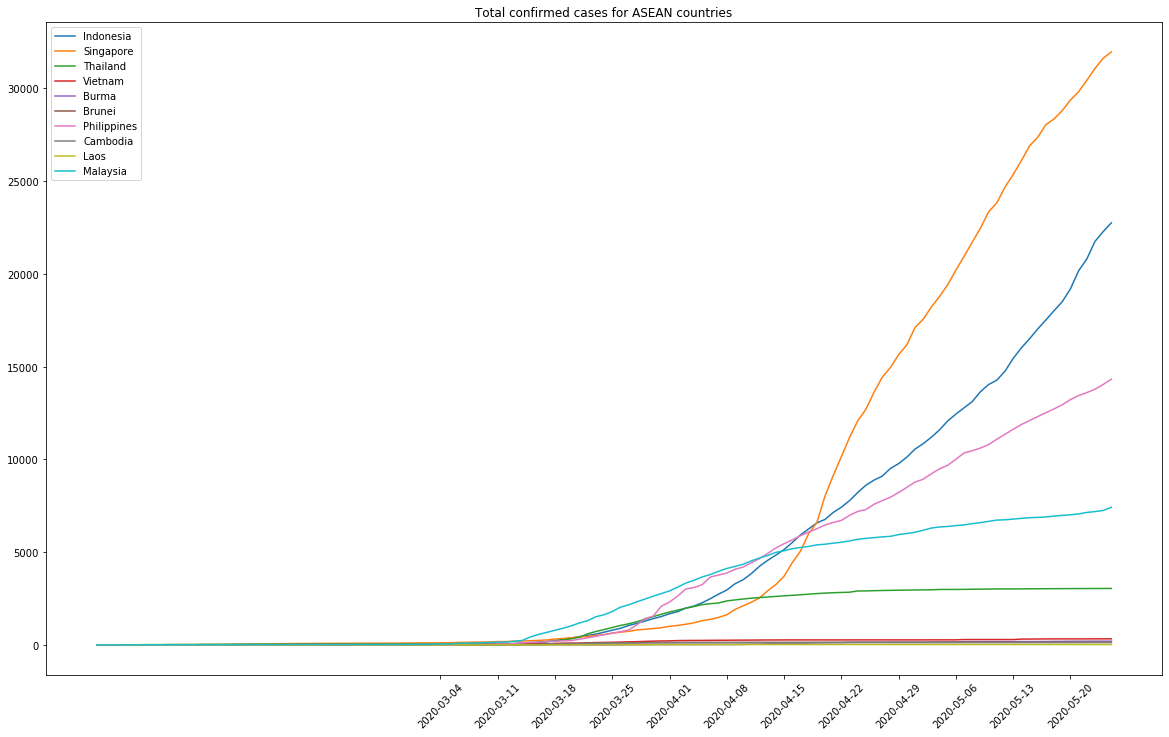

In [148]:
plt.figure(figsize=(20,12))
plt.title('Total confirmed cases for ASEAN countries')
for country in asean:
    plt.plot(data_indo.index,data[data['Country'] == country]['Confirmed'],label=country)
plt.legend()
plt.xticks(date_1,rotation=45)
plt.show()

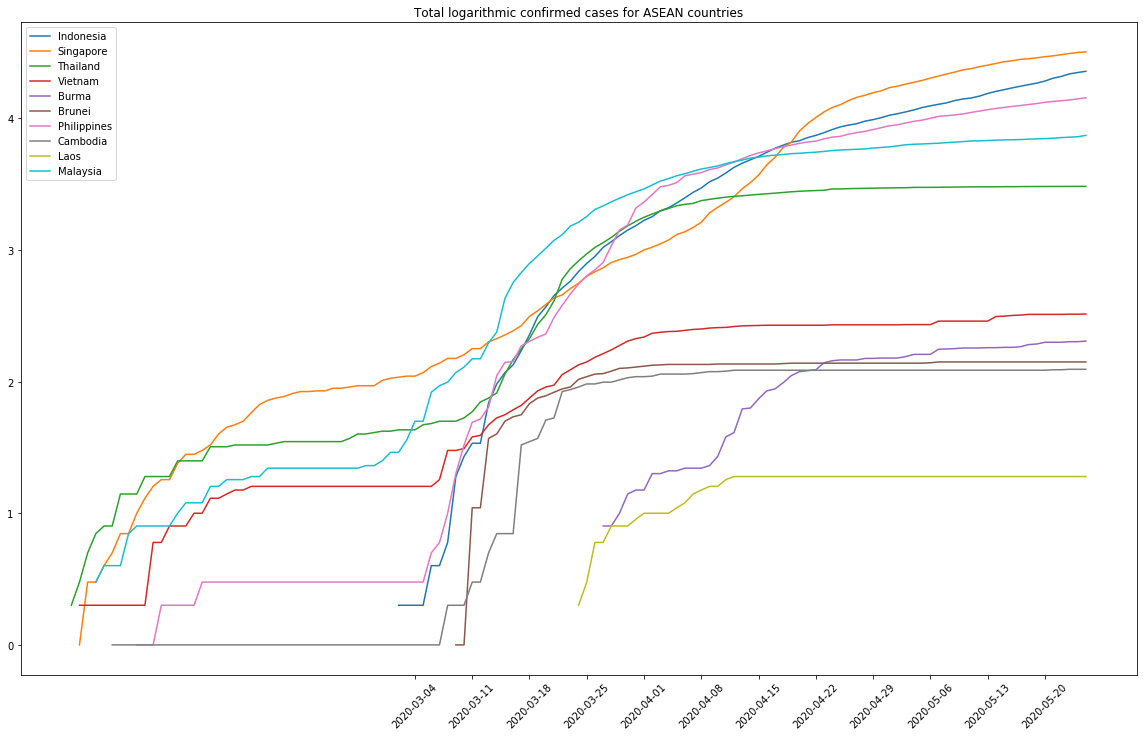

In [149]:
plt.figure(figsize=(20,12))
plt.title('Total logarithmic confirmed cases for ASEAN countries')
for country in asean:
    plt.plot(data_indo.index,np.log10(data[data['Country'] == country]['Confirmed']),label=country)
plt.legend()
plt.xticks(date_1,rotation=45)
plt.show()

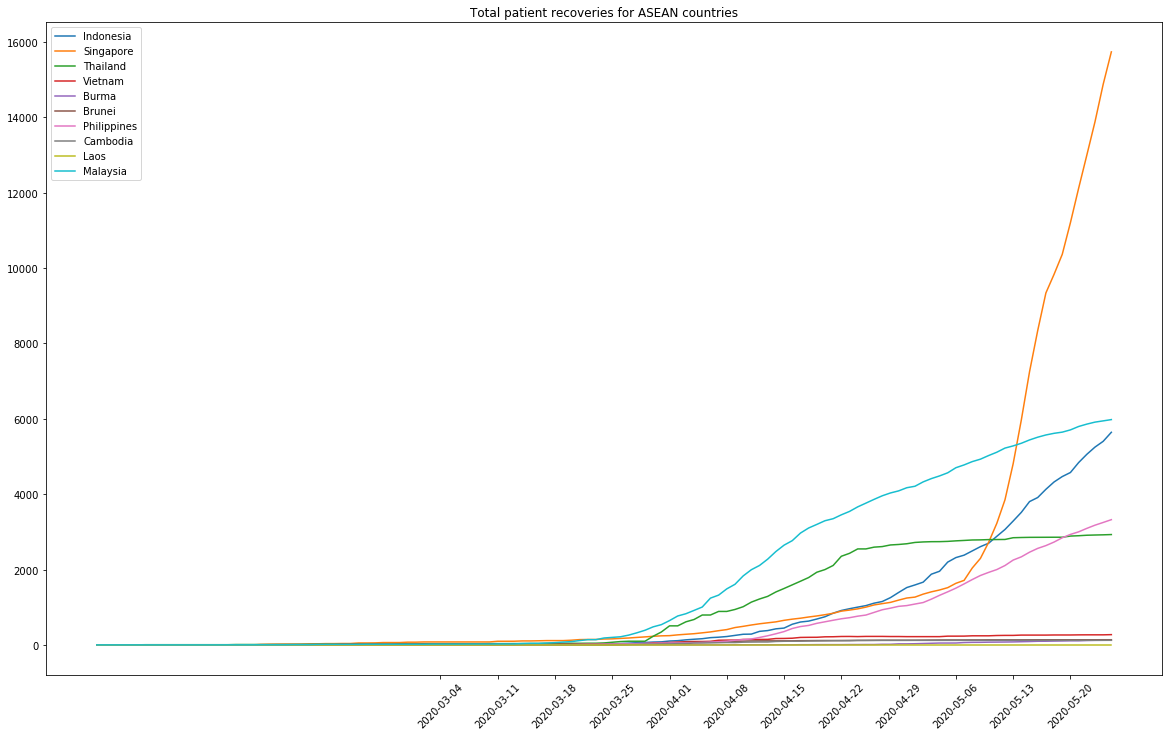

In [150]:
plt.figure(figsize=(20,12))
plt.title('Total patient recoveries for ASEAN countries')
for country in asean:
    plt.plot(data_indo.index,data[data['Country'] == country]['Recovered'],label=country)
plt.legend()
plt.xticks(date_1,rotation=45)
plt.show()

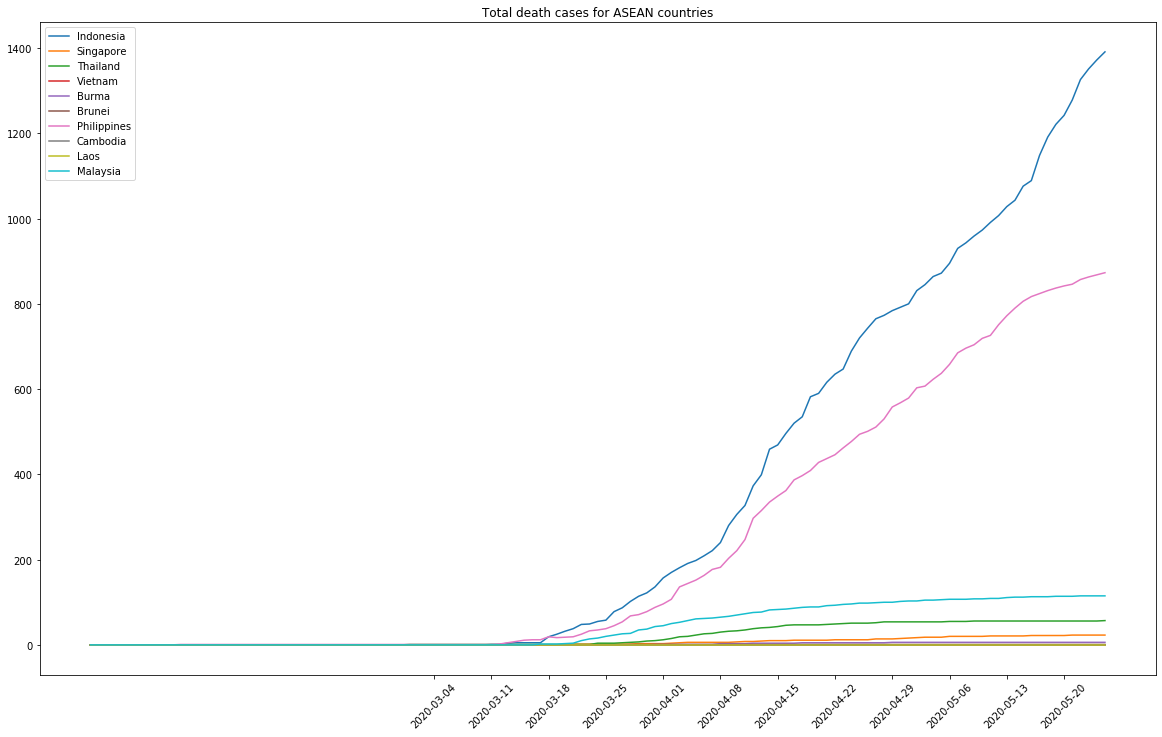

In [151]:
plt.figure(figsize=(20,12))
plt.title('Total death cases for ASEAN countries')
for country in asean:
    plt.plot(data_indo.index,data[data['Country'] == country]['Deaths'],label=country)
plt.legend()
plt.xticks(date_1,rotation=45)
plt.show()

In [152]:
last_date = data.index.max()

asean_mortal_rate = []
for country in asean:
    asean_mortal_rate.append(round((data[(data['Country'] == country)&(data.index==last_date)]['Deaths']/data[(data['Country'] == country)& (data.index==last_date)]['Confirmed']).values[0]*100,2))
    
asean_confirm = []
for country in asean:
    asean_confirm.append(data[(data['Country'] == country)& (data.index==last_date)]['Confirmed'].values[0])

asean_death = []
for country in asean:
    asean_death.append(data[(data['Country'] == country)& (data.index==last_date)]['Deaths'].values[0])
    
mortal = {
    'Country':asean,
    'Confirmed':asean_confirm,
    'Deaths':asean_death,
    '% Mortality' : asean_mortal_rate
}
data_mortal = pd.DataFrame(data=mortal).sort_values(by='% Mortality', ascending=True)
data_mortal

,Country,Confirmed,Deaths,% Mortality
3,Vietnam,326,0,0.00
7,Cambodia,124,0,0.00
8,Laos,19,0,0.00
1,Singapore,31960,23,0.07
5,Brunei,141,1,0.71
9,Malaysia,7417,115,1.55
2,Thailand,3042,57,1.87
4,Burma,203,6,2.96
6,Philippines,14319,873,6.10
0,Indonesia,22750,1391,6.11


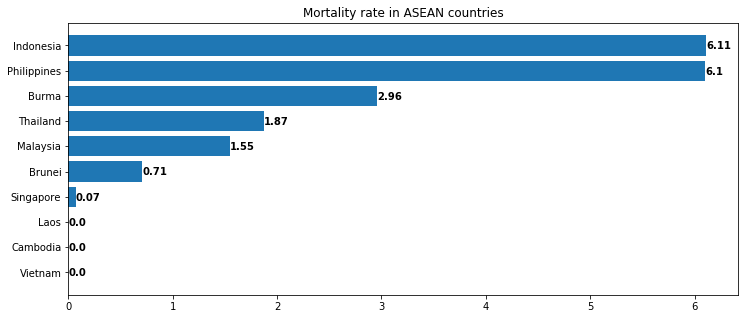

In [153]:
plt.figure(figsize=(12,5))
plt.title('Mortality rate in ASEAN countries')
plt.barh(data_mortal['Country'],data_mortal['% Mortality'])
for i, v in enumerate(data_mortal['% Mortality']):
    plt.text(v, i-0.15 , str(v), fontweight='bold')
plt.show()

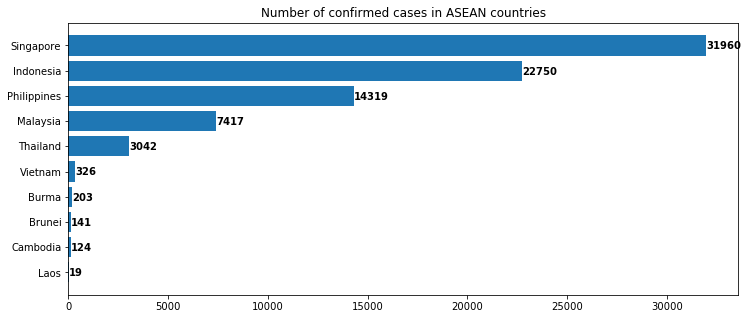

In [154]:
data_mortal_sort = data_mortal.sort_values('Confirmed',ascending=True)
plt.figure(figsize=(12,5))
plt.title('Number of confirmed cases in ASEAN countries')
plt.barh(data_mortal_sort['Country'],data_mortal_sort['Confirmed'])
for i, v in enumerate(data_mortal_sort['Confirmed']):
    plt.text(v, i-0.15 , str(v), fontweight='bold')
plt.show()

In [155]:
asean_recover_rate = []
for country in asean:
    asean_recover_rate.append(round((data[(data['Country'] == country)&(data.index==last_date)]['Recovered']/data[(data['Country'] == country)& (data.index==last_date)]['Confirmed']).values[0]*100,2))
    
asean_recover = []
for country in asean:
    asean_recover.append(data[(data['Country'] == country)& (data.index==last_date)]['Recovered'].values[0])
    
recover = {
    'Country':asean,
    'Confirmed':asean_confirm,
    'Recovered':asean_recover,
    '% Recovered' : asean_recover_rate
}
data_recover = pd.DataFrame(data=recover).sort_values(by='% Recovered', ascending=False)
data_recover

,Country,Confirmed,Recovered,% Recovered
7,Cambodia,124,122,98.39
5,Brunei,141,137,97.16
2,Thailand,3042,2928,96.25
3,Vietnam,326,272,83.44
9,Malaysia,7417,5979,80.61
4,Burma,203,123,60.59
1,Singapore,31960,15738,49.24
0,Indonesia,22750,5642,24.80
6,Philippines,14319,3323,23.21
8,Laos,19,0,0.00


In [156]:
data_indo_clean = data_indo.drop(columns=['Province','Lat','Long'])

In [157]:
data_indo_clean.to_csv('indo.csv')